In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import sys
from matplotlib import pyplot as plt
sys.path.append('../')

2024-09-05 18:59:59.967944: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-05 18:59:59.968628: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-05 18:59:59.972247: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-05 18:59:59.983273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 19:00:00.001187: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
from Layers.dense import Dense
from Layers.convolutional import Convolutional
from Layers.reshape import Reshape
from Functions.activation_functions import RelU, Softmax
from Functions.loss_functions import CategoricalCrossEntropy
from network import Network

1/100, error=86.42904566092493
2/100, error=8.273287771682057
3/100, error=3.857374244156512
4/100, error=2.6858449625890395
5/100, error=2.080321385208226
6/100, error=1.6189967055401218
7/100, error=1.3427982837114527
8/100, error=1.1521306353434455
9/100, error=0.960905209516939
10/100, error=0.8401128122199991
11/100, error=0.7491500883308768
12/100, error=0.6734882763299198
13/100, error=0.6141743086623308
14/100, error=0.5608830164842663
15/100, error=0.5120330485160516
16/100, error=0.46890475076191096
17/100, error=0.44050046972005147
18/100, error=0.4052138637262136
19/100, error=0.38095120085874035
20/100, error=0.3606138945927497
21/100, error=0.34105804303807147
22/100, error=0.3224534152034117
23/100, error=0.3054417022655577
24/100, error=0.2905830746422706
25/100, error=0.2774920676668165
26/100, error=0.263735071824178
27/100, error=0.25131333402460054
28/100, error=0.24166002586052868
29/100, error=0.23130131586196026
30/100, error=0.22054864776821487
31/100, error=0.2

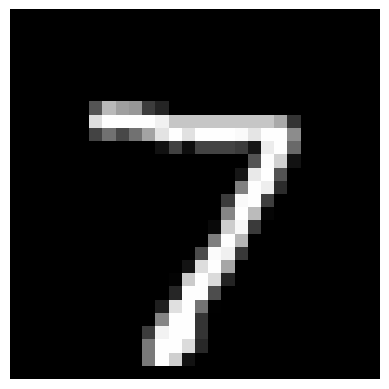

predicted: 7 	true: 7


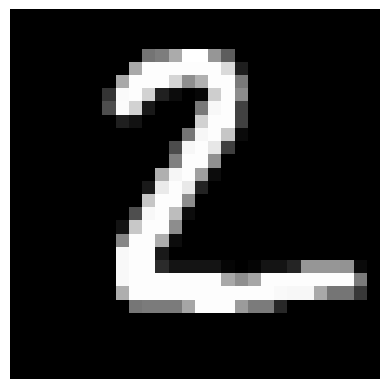

predicted: 2 	true: 2


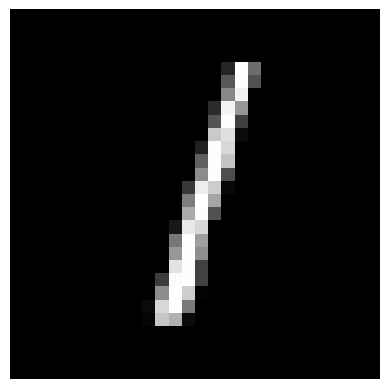

predicted: 1 	true: 1


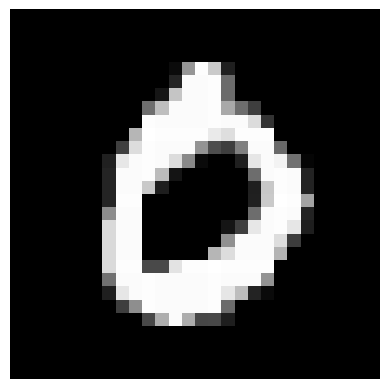

predicted: 0 	true: 0


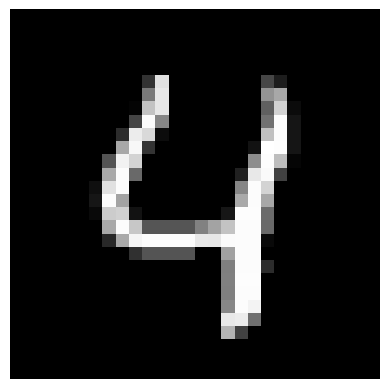

predicted: 4 	true: 4


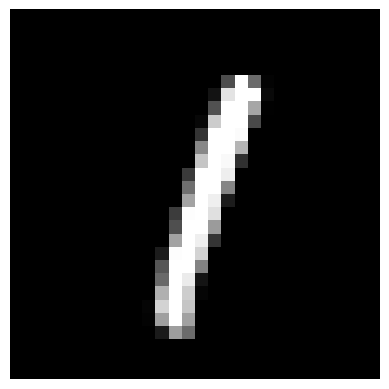

predicted: 1 	true: 1


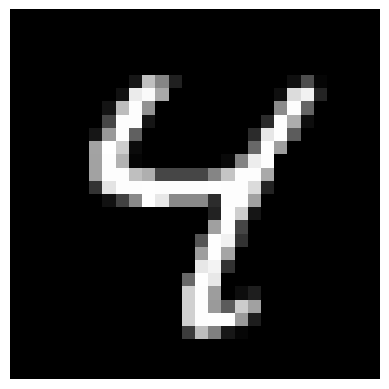

predicted: 4 	true: 4


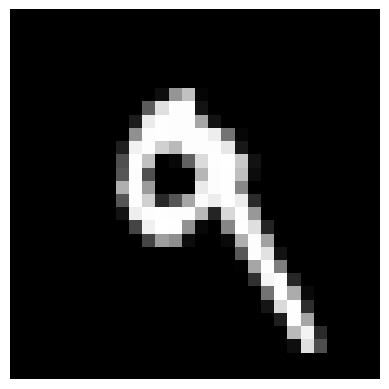

predicted: 9 	true: 9


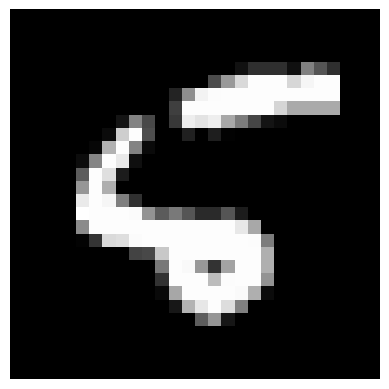

predicted: 6 	true: 5


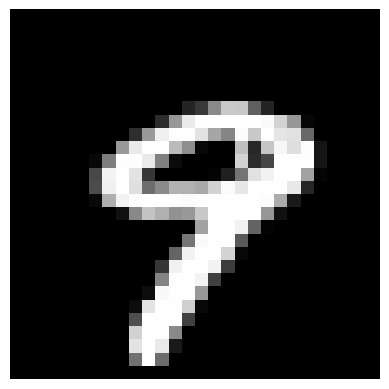

predicted: 9 	true: 9
90.0 %  successful classifications


In [3]:
def preprocess_data(x, y, limit):
    # reshape input data
    x = x.reshape(x.shape[0], 1, 28, 28)
    # converting array to float and normalising to avoid large gradient values
    x = x.astype(float) / 255
    # one-hot encode output
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]

# load MNIST from server
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, train_y = preprocess_data(train_x, train_y, 5000)
test_x, test_y = preprocess_data(test_x, test_y, 10)

network = Network([
    Convolutional((1, 28, 28), 3, 5),
    RelU(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)), # Flatten
    Dense(5 * 26 * 26, 100),
    RelU(),
    Dense(100, 10),
    Softmax()
])

# train
network.train(CategoricalCrossEntropy, train_x, train_y, epochs=100, learning_rate=0.00055, verbose=True)

# test
stat = 0
index = 0
for x, y in zip(test_x, test_y):
    current_image = test_x[index, :, None]
    current_image = current_image.reshape(28, 28)
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.axis("off")
    plt.show()
    
    output = network.predict(x)
    print('predicted:', np.argmax(output), '\ttrue:', np.argmax(y))
    index += 1
    if np.argmax(output) == np.argmax(y): stat += 1

print(stat/test_x.shape[0] * 100, '%', " successful classifications")